In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os
import dxchange
import glob
from enum import Enum

from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display, HTML
import h5py
import pandas as pd

import matplotlib.patches as patches
from scipy.constants import h, c, electron_volt, m_n

from code.utility import *

ipts = 36035

class DefaultOBRegion(Enum):
    x = 278
    y = 242
    width = 199
    height = 31


class DefaultSampleRegion(Enum):
    x = DefaultOBRegion.x
    y = 300
    width = DefaultOBRegion
    height = DefaultOBRegion.height

=============== USER INPUT ==========================================

In [29]:
sample_run_number = "8748"

===================================================================

# load the data

In [30]:
input_file_name_dict = define_input_full_file_name(sample_run_number, ipts)
sample_full_path = input_file_name_dict["sample_full_path"]
spectra_file = input_file_name_dict["spectra_file"]
nexus_file = input_file_name_dict["nexus_file"]
list_tiff = input_file_name_dict["list_tiff"]

In [31]:
data = load_tiff_files(list_tiff)
lambda_axis = get_lambda_axis(nexus_file, spectra_file)

# Display integrated signal

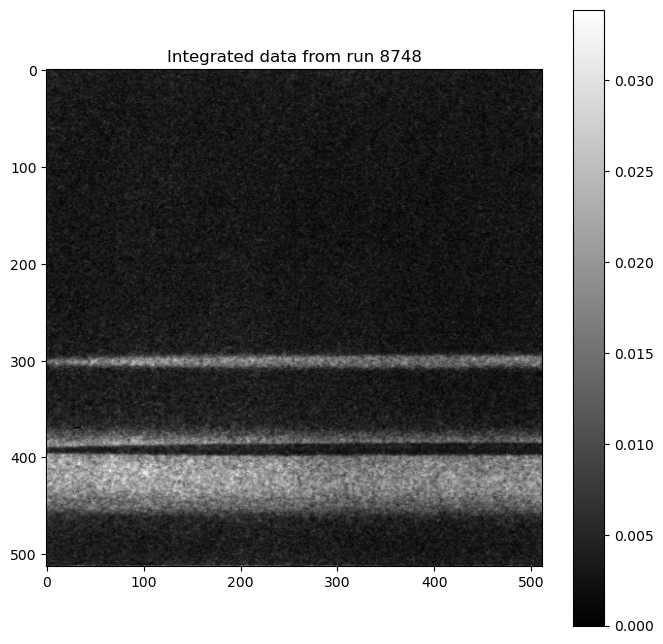

In [32]:
data_integrated = display_integrated_signal(data, sample_run_number)

# normalization

#### select open beam region within your data

In [33]:

def plot_roi(x, y, width, height):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    im = ax.imshow(data_integrated, cmap='gray')
    _rectangle1 = patches.Rectangle((x, y),
                                    width,
                                    height,
                                    edgecolor='red',
                                    linewidth=2,
                                    fill=False)
    ax.add_patch(_rectangle1)

    plt.colorbar(im, ax=ax)
    ax.set_title(f"ROI from x:{x} y:{y} width:{width} height:{height}")

    return x, y, width, height

ob_display_plot_roi = interactive(plot_roi, 
                               x=widgets.IntSlider(min=0, 
                                                   max=data_integrated.shape[1], 
                                                    step=1, 
                                                    value=DefaultOBRegion.x.value),
                               y=widgets.IntSlider(min=0, 
                                                   max=data_integrated.shape[1], 
                                                   step=1, 
                                                   value=DefaultOBRegion.y.value),
                               width=widgets.IntSlider(min=0, 
                                                       max=data_integrated.shape[1], 
                                                       step=1, 
                                                       value=DefaultOBRegion.width.value),
                               height=widgets.IntSlider(min=0, 
                                                        max=data_integrated.shape[1], 
                                                        step=1, 
                                                        value=DefaultOBRegion.height.value),
                                                        )

display(ob_display_plot_roi)

interactive(children=(IntSlider(value=278, description='x', max=512), IntSlider(value=242, description='y', ma…

### display profile of open beam region

Text(0, 0.5, 'Mean counts')

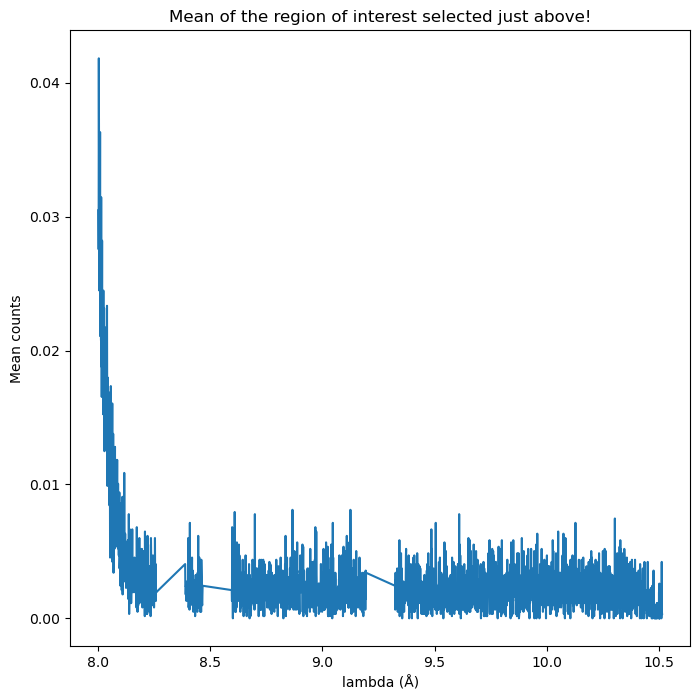

In [34]:
x, y, width, height = ob_display_plot_roi.result

ob_profile_region = []
for _data in data:
    # calculate the mean of the region of interest
    ob_profile_region.append(np.mean(_data[y: y+height, x: x+width]))

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(lambda_axis, ob_profile_region)
ax.set_title(f"Mean of the region of interest selected just above!")
ax.set_xlabel(u"lambda (\u212B)")
ax.set_ylabel("Mean counts")

#### Perform normalization

/tmp/ipykernel_463350/1901101755.py:6: RuntimeWarning: divide by zero encountered in divide
  normalized_data[_index] = _data / _mean_roi_counts
/tmp/ipykernel_463350/1901101755.py:6: RuntimeWarning: invalid value encountered in divide
  normalized_data[_index] = _data / _mean_roi_counts


Text(0.5, 1.0, 'Integrated normalized data from run 8747')

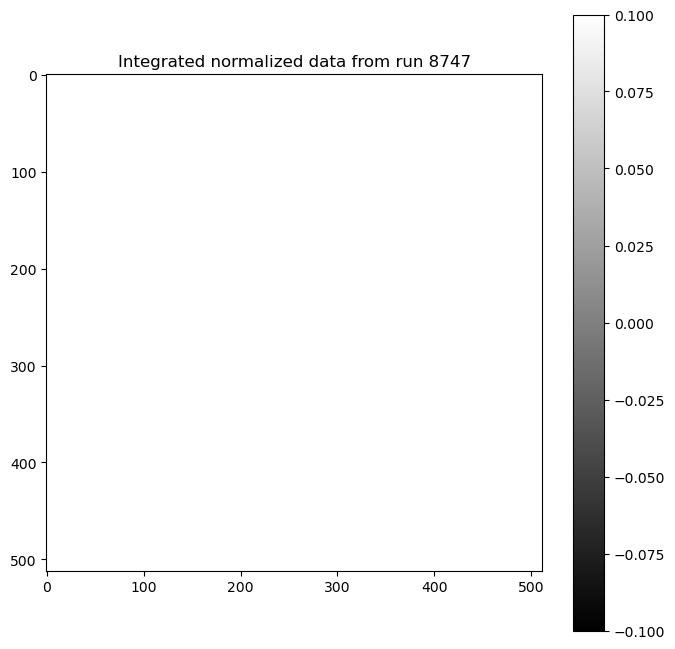

In [20]:
x, y, width, height = ob_display_plot_roi.result

normalized_data = np.zeros_like(data, dtype=np.float32)
for _index, _data in enumerate(data):
    _mean_roi_counts = np.mean(_data[y:y+height, x:x+width])
    normalized_data[_index] = _data / _mean_roi_counts
    
integrated_normalized = np.mean(normalized_data, axis=0)
fig, ax = plt.subplots(1,1, figsize=(8, 8))
im = ax.imshow(integrated_normalized, cmap='gray')
plt.colorbar(im, ax=ax)
ax.set_title(f"Integrated normalized data from run {sample_run_number}")

# display profile

In [21]:

def plot_roi(x, y, width, height):
    fig, ax = plt.subplots(1, 2, figsize=(15, 8))
    im = ax[0].imshow(integrated_normalized, cmap='gray')
    _rectangle1 = patches.Rectangle((x, y),
                                    width,
                                    height,
                                    edgecolor='red',
                                    linewidth=2,
                                    fill=False)
    ax[0].add_patch(_rectangle1)
    plt.colorbar(im, ax=ax[0])
    ax[0].set_title(f"ROI from x:{x} y:{y} width:{width} height:{height}")

    sample_profile_region = []
    for _data in data:
        # calculate the mean of the region of interest
        sample_profile_region.append(np.mean(_data[y: y+height, x: x+width]))
    ax[1].plot(lambda_axis, sample_profile_region)
    ax[1].set_title(f"Profile of the region seleted")
    ax[1].set_xlabel(u"lambda (\u212B)")
    ax[1].set_ylabel("Mean counts")

    plt.tight_layout()

    return x, y, width, height

sample_display_plot_roi = interactive(plot_roi, 
                               x=widgets.IntSlider(min=0, 
                                                   max=data_integrated.shape[1], 
                                                    step=1, 
                                                    continuous_update=False,
                                                    value=x),
                               y=widgets.IntSlider(min=0, 
                                                   max=data_integrated.shape[1], 
                                                    continuous_update=False,
                                                   step=1, 
                                                   value=y),
                               width=widgets.IntSlider(min=0, 
                                                       max=data_integrated.shape[1], 
                                                    continuous_update=False,
                                                       step=1, 
                                                       value=width),
                               height=widgets.IntSlider(min=0, 
                                                        max=data_integrated.shape[1], 
                                                    continuous_update=False,
                                                        step=1, 
                                                        value=height),
)

display(sample_display_plot_roi)

interactive(children=(IntSlider(value=278, continuous_update=False, description='x', max=512), IntSlider(value…

Text(0, 0.5, 'Mean counts')

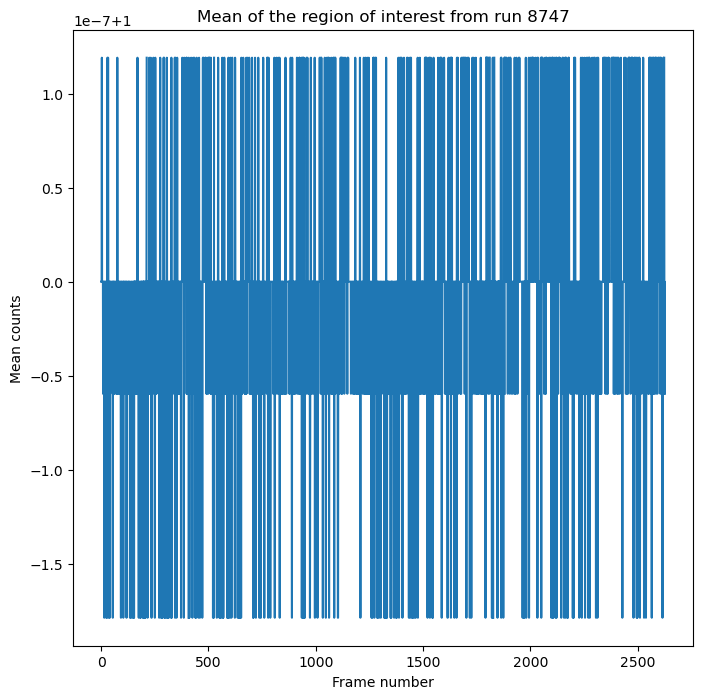

In [12]:
x, y, width, height = sample_display_plot_roi.result

profile_of_region = []
for _data in normalized_data:
    # calculate the mean of the region of interest
    profile_of_region.append(np.mean(_data[y: y+height, x: x+width]))

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(profile_of_region)
ax.set_title(f"Mean of the region of interest from run {sample_run_number}")
ax.set_xlabel("Frame number")
ax.set_ylabel("Mean counts")

Text(0, 0.5, 'Mean counts')

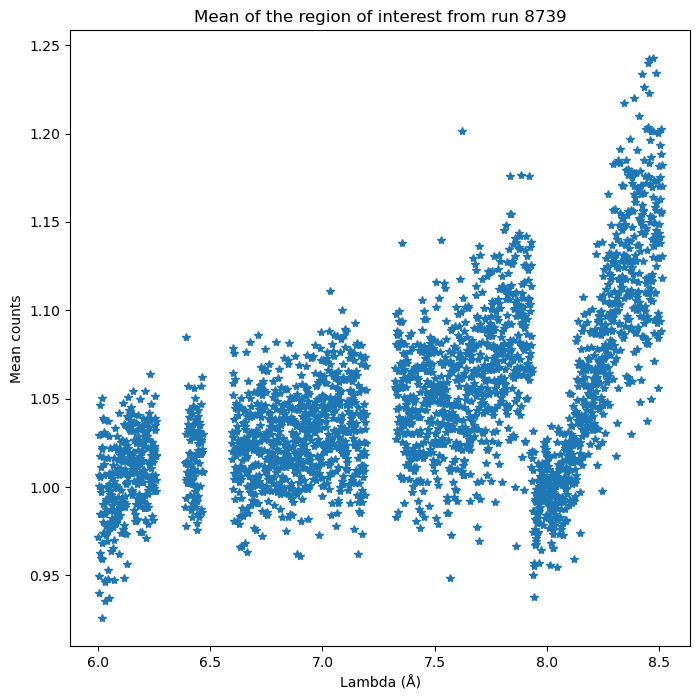

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(lambda_axis, profile_of_region, '*')
ax.set_title(f"Mean of the region of interest from run {sample_run_number}")
ax.set_xlabel(u"Lambda (\u212b)")
ax.set_ylabel("Mean counts")

# rebining the data

In [21]:
rebin_by = 2

Text(0, 0.5, 'Mean counts')

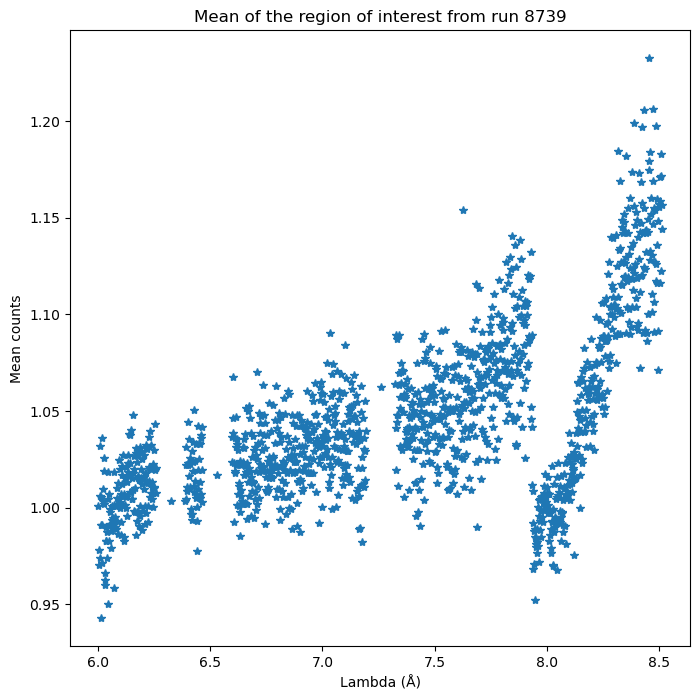

In [22]:
end_index = 0
rebinned_profile = []
lambda_rebinned_axis = []
while end_index < len(lambda_axis):
    start_index = end_index
    end_index += rebin_by
    rebinned_profile.append(np.mean(profile_of_region[start_index:end_index]))
    lambda_rebinned_axis.append(np.mean(lambda_axis[start_index:end_index]))

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(lambda_rebinned_axis, rebinned_profile, '*')
ax.set_title(f"Mean of the region of interest from run {sample_run_number}")
ax.set_xlabel(u"Lambda (\u212b)")
ax.set_ylabel("Mean counts")